In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [8]:
users_session_df = pd.read_csv('airbnb-recruiting-new-user-bookings/user_session_merged.csv')
users_session_df

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_97022/3817470147.py:1: DtypeWarning: Columns (2,3,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  users_session_df = pd.read_csv('airbnb-recruiting-new-user-bookings/user_session_merged.csv')


,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaN,2014-01-01 02:32:47,api,2014-01-01 13:08:00
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaN,2014-01-03 07:03:32,direct,2014-01-04 18:03:32
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaN,2014-01-03 07:03:32,direct,2014-01-05 10:10:12
...,...,...,...,...,...,...,...,...,...,...,...
9092121,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaN,NaN,NaN,NaN,NaN
9092122,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaN,NaN,NaN,NaN,NaN
9092123,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaN,NaN,NaN,NaN,NaN
9092124,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaN,NaN,NaN,NaN,NaN


In [3]:
users_session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092126 entries, 0 to 9092125
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   action                  object 
 2   action_type             object 
 3   action_detail           object 
 4   device_type             object 
 5   secs_elapsed            float64
 6   date_account_created    object 
 7   date_first_booking      object 
 8   timestamp_first_active  object 
 9   affiliate_channel       object 
 10  session_timestamp       object 
dtypes: float64(1), object(10)
memory usage: 763.0+ MB


In [9]:
# date_account_created, timestamp_first_active, date_first_booking를 날짜 형식으로 변환
users_session_df['date_account_created'] = pd.to_datetime(users_session_df['date_account_created'], errors='coerce')
users_session_df['timestamp_first_active'] = pd.to_datetime(users_session_df['timestamp_first_active'], errors='coerce')
users_session_df['date_first_booking'] = pd.to_datetime(users_session_df['date_first_booking'], errors='coerce')
users_session_df['session_timestamp'] = pd.to_datetime(users_session_df['session_timestamp'], errors='coerce')

# 변환이 제대로 되었는지 확인
users_session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092126 entries, 0 to 9092125
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
 9   affiliate_channel       object        
 10  session_timestamp       datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(6)
memory usage: 763.0+ MB


In [10]:
len(users_session_df['user_id'].unique())

134981

# DAU(Daily Active User)

In [13]:
# 날짜 정보만 추출하여 새로운 컬럼 'date'에 저장
users_session_df['date'] = users_session_df['session_timestamp'].dt.date

# 각 날짜별로 활성 사용자 수를 계산하여 DAU를 구하기
dau = users_session_df.groupby('date')['user_id'].nunique().reset_index()
dau.columns = ['date', 'DAU']
dau


,date,DAU
0,2014-01-01,131
1,2014-01-02,343
2,2014-01-03,430
3,2014-01-04,368
4,2014-01-05,361
...,...,...
187,2014-07-07,3
188,2014-07-08,1
189,2014-07-11,1
190,2014-07-12,1


In [26]:
# dau.to_csv("airbnb-recruiting-new-user-bookings/tmp/dau.csv", index=False)

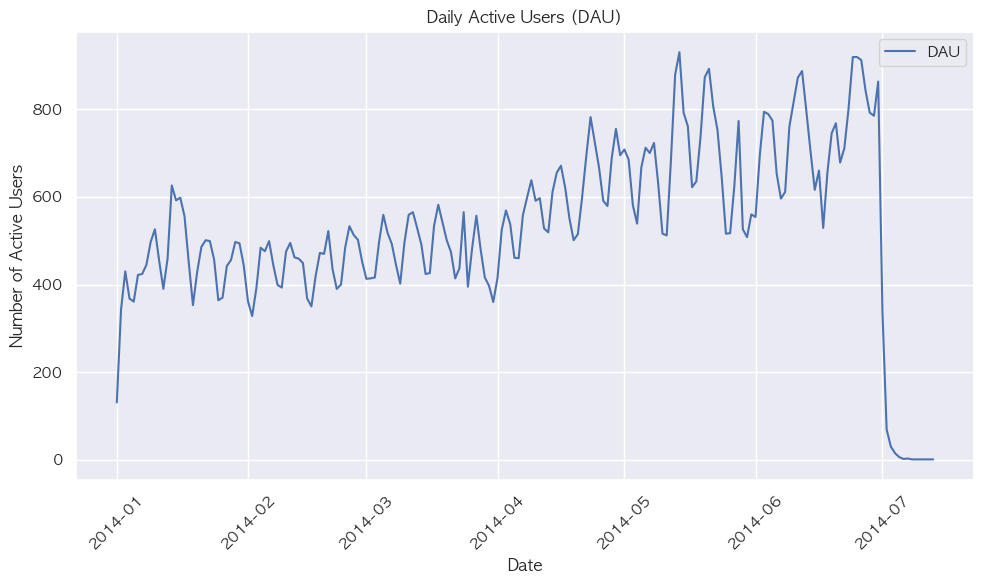

In [27]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(dau['date'], dau['DAU'], linestyle='-', color='b', label='DAU')

# 그래프 제목과 축 레이블 설정
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')

# x 축 날짜 형식 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.grid(True)
plt.legend()
plt.show()

### 월별로 dau를 나눠서 표시해보자. 

In [28]:
# 월별 데이터 분리
# 월 정보를 추출하여 새로운 컬럼 'month'에 저장
dau['month'] = pd.to_datetime(dau['date']).dt.to_period('M')
dau

,date,DAU,month
0,2014-01-01,131,2014-01
1,2014-01-02,343,2014-01
2,2014-01-03,430,2014-01
3,2014-01-04,368,2014-01
4,2014-01-05,361,2014-01
...,...,...,...
187,2014-07-07,3,2014-07
188,2014-07-08,1,2014-07
189,2014-07-11,1,2014-07
190,2014-07-12,1,2014-07


In [36]:
# 'month' 컬럼을 기준으로 그룹화하고, 각 그룹의 DAU 평균 계산
monthly_avg_dau = dau.groupby('month')['DAU'].mean().reset_index()
print(monthly_avg_dau)

     month         DAU
0  2014-01  447.290323
1  2014-02  443.857143
2  2014-03  476.935484
3  2014-04  596.600000
4  2014-05  677.612903
5  2014-06  749.966667
6  2014-07   42.636364


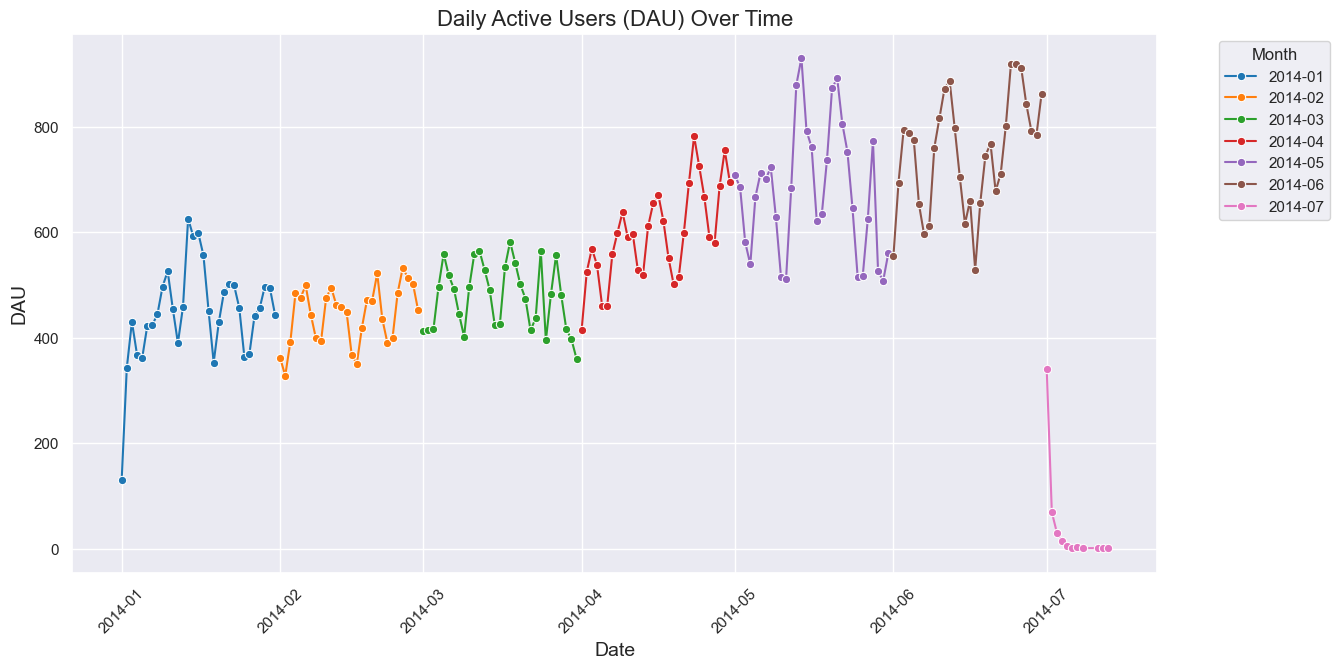

In [39]:
# 그래프의 스타일을 설정합니다.
sns.set(style="darkgrid")

# 그래프를 그립니다.
plt.figure(figsize=(14, 7))
sns.lineplot(data=dau, x='date', y='DAU', hue='month', palette='tab10', marker='o')

# 그래프 제목과 축 레이블을 설정합니다.
plt.title('Daily Active Users (DAU) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('DAU', fontsize=14)

# x축의 날짜 형식을 조정합니다.
plt.xticks(rotation=45)

# 범례를 그래프 밖으로 설정합니다.
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프를 출력합니다.
plt.show()

In [42]:
# 'day' 컬럼을 추가하여 날짜의 일(day) 부분을 저장합니다.
dau['date'] = pd.to_datetime(dau['date'])
dau['day'] = dau['date'].dt.day
dau

,date,DAU,month,day
0,2014-01-01,131,2014-01,1
1,2014-01-02,343,2014-01,2
2,2014-01-03,430,2014-01,3
3,2014-01-04,368,2014-01,4
4,2014-01-05,361,2014-01,5
...,...,...,...,...
187,2014-07-07,3,2014-07,7
188,2014-07-08,1,2014-07,8
189,2014-07-11,1,2014-07,11
190,2014-07-12,1,2014-07,12


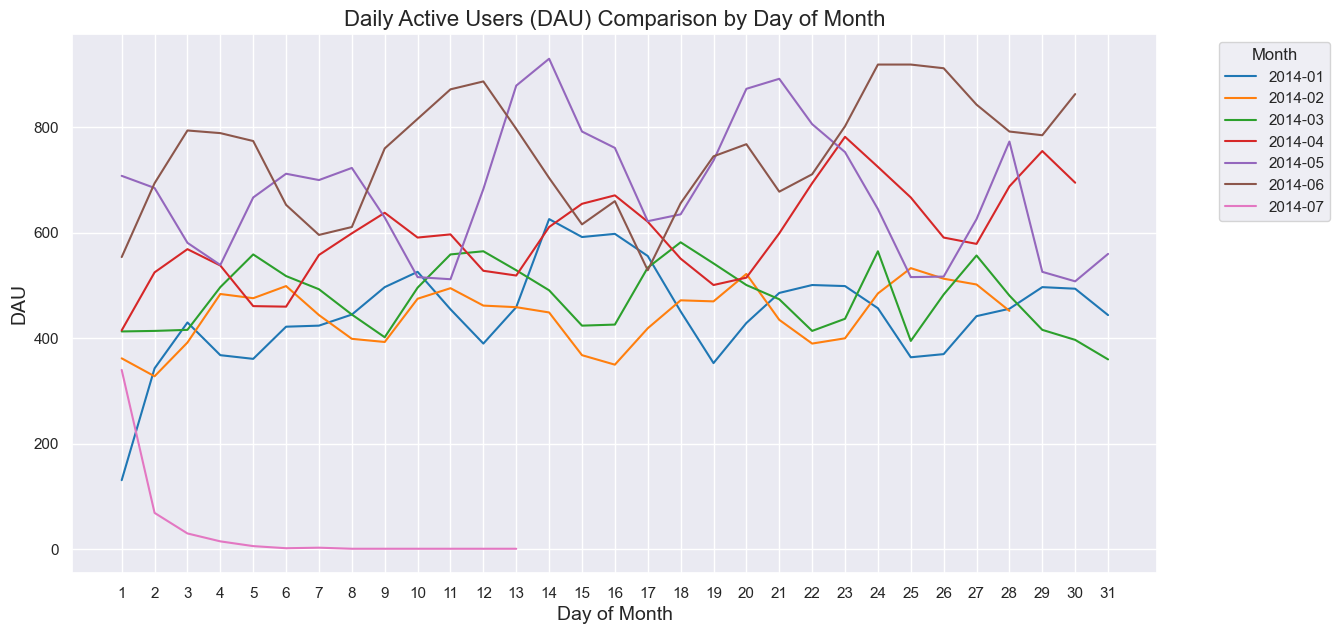

In [44]:
# 그래프를 그립니다.
plt.figure(figsize=(14, 7))
sns.lineplot(data=dau, x='day', y='DAU', hue='month', palette='tab10')

# 그래프 제목과 축 레이블을 설정합니다.
plt.title('Daily Active Users (DAU) Comparison by Day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('DAU', fontsize=14)

# x축의 날짜 형식을 조정합니다.
plt.xticks(range(1, 32))

# 범례를 그래프 밖으로 설정합니다.
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프를 출력합니다.
plt.show()

- 2014-01 (파란색): 초반에 급격히 증가하다가 중반 이후 비교적 안정된 추세를 보임

- 2014-02 (주황색): 전체적으로 비교적 낮은 편

- 2014-03 (초록색): 중반 이후 비교적 안정적이지만 중간중간 변동이 있음

- 2014-04 (빨간색): 중반 이후 크게 변동

- 2014-05 (보라색): 비교적 안정적이지만 후반에 변동이 큼

- 2014-06 (갈색): 높은 편이며 중반 이후 큰 변동을 보임

In [33]:
# 각 달의 데이터프레임을 딕셔너리에 저장
monthly_data = {month: dau[dau['month'] == month] for month in dau['month'].unique()}
monthly_data

{Period('2014-01', 'M'):           date  DAU    month
 0   2014-01-01  131  2014-01
 1   2014-01-02  343  2014-01
 2   2014-01-03  430  2014-01
 3   2014-01-04  368  2014-01
 4   2014-01-05  361  2014-01
 5   2014-01-06  422  2014-01
 6   2014-01-07  424  2014-01
 7   2014-01-08  445  2014-01
 8   2014-01-09  497  2014-01
 9   2014-01-10  526  2014-01
 10  2014-01-11  455  2014-01
 11  2014-01-12  390  2014-01
 12  2014-01-13  459  2014-01
 13  2014-01-14  626  2014-01
 14  2014-01-15  592  2014-01
 15  2014-01-16  598  2014-01
 16  2014-01-17  556  2014-01
 17  2014-01-18  451  2014-01
 18  2014-01-19  353  2014-01
 19  2014-01-20  429  2014-01
 20  2014-01-21  486  2014-01
 21  2014-01-22  501  2014-01
 22  2014-01-23  499  2014-01
 23  2014-01-24  457  2014-01
 24  2014-01-25  364  2014-01
 25  2014-01-26  370  2014-01
 26  2014-01-27  442  2014-01
 27  2014-01-28  456  2014-01
 28  2014-01-29  497  2014-01
 29  2014-01-30  494  2014-01
 30  2014-01-31  444  2014-01,
 Period('2014-0

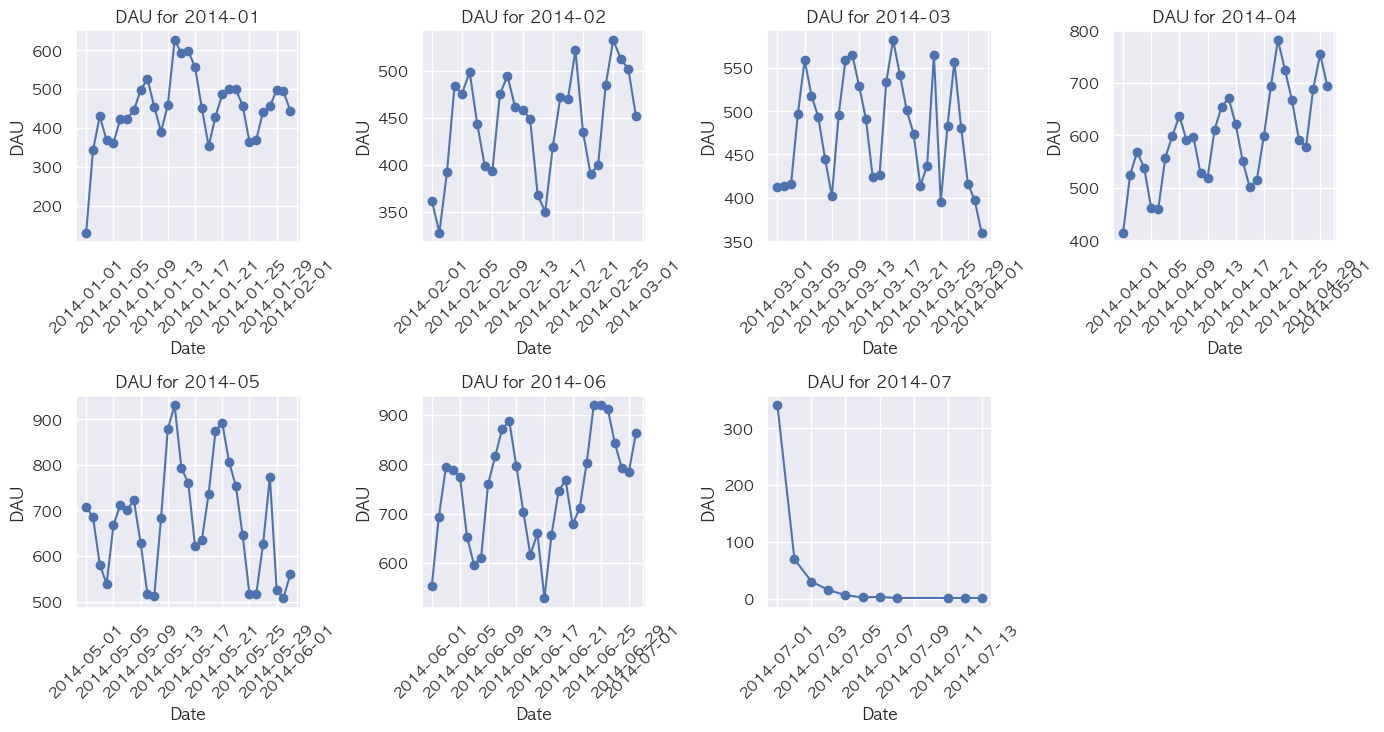

In [30]:
# 3. 월별 DAU 시각화
plt.figure(figsize=(14, 10))

for i, (month, data) in enumerate(monthly_data.items(), 1):
    plt.subplot(3, 4, i)
    plt.plot(data['date'], data['DAU'], marker='o', linestyle='-')
    plt.title(f'DAU for {month}')
    plt.xlabel('Date')
    plt.ylabel('DAU')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

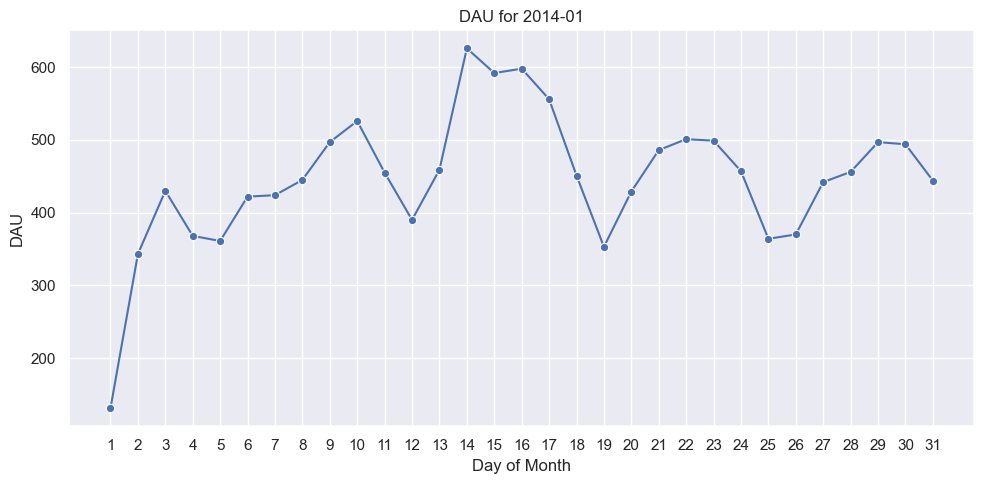

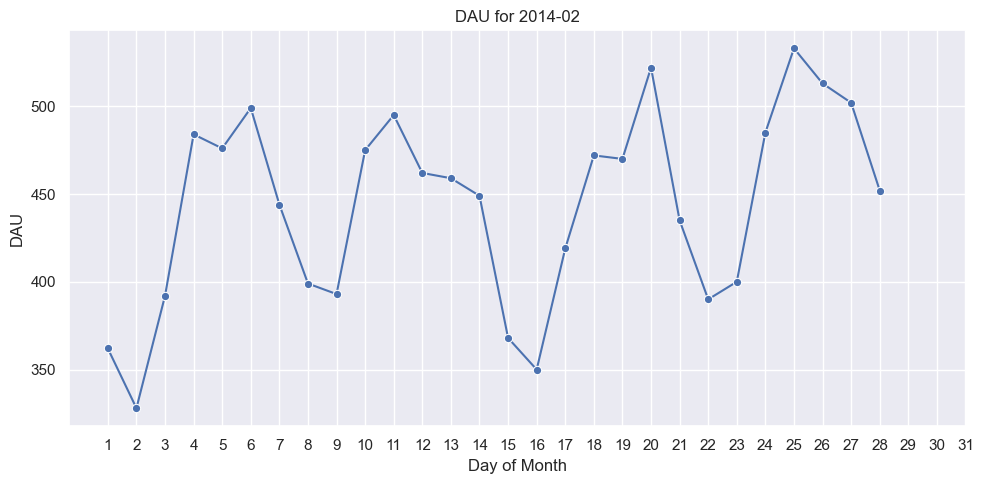

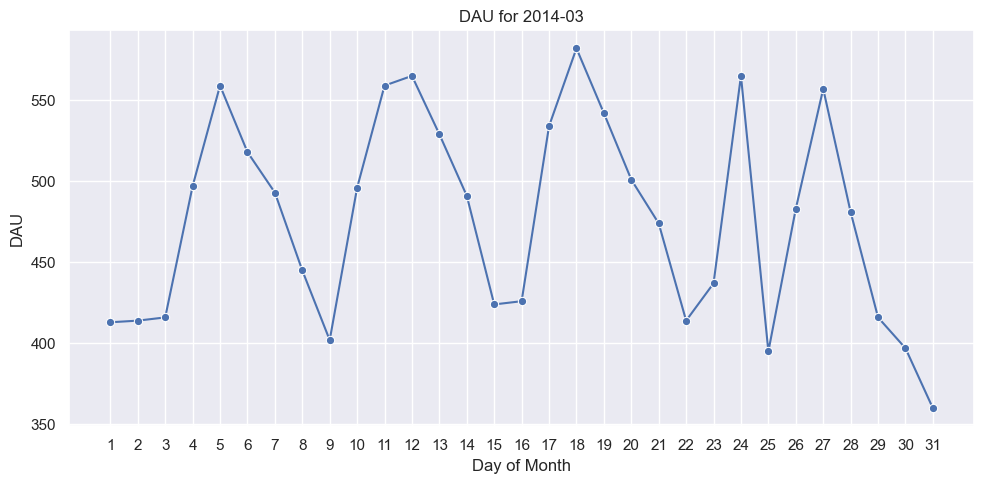

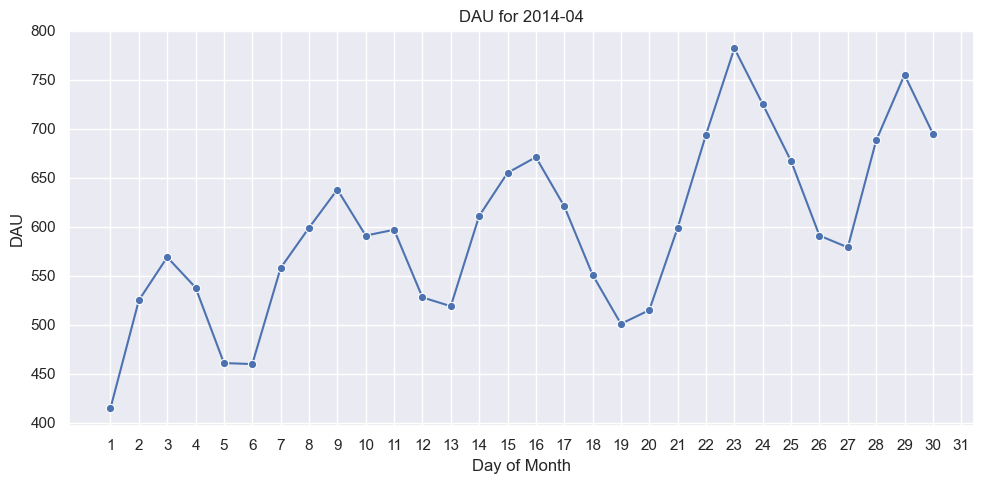

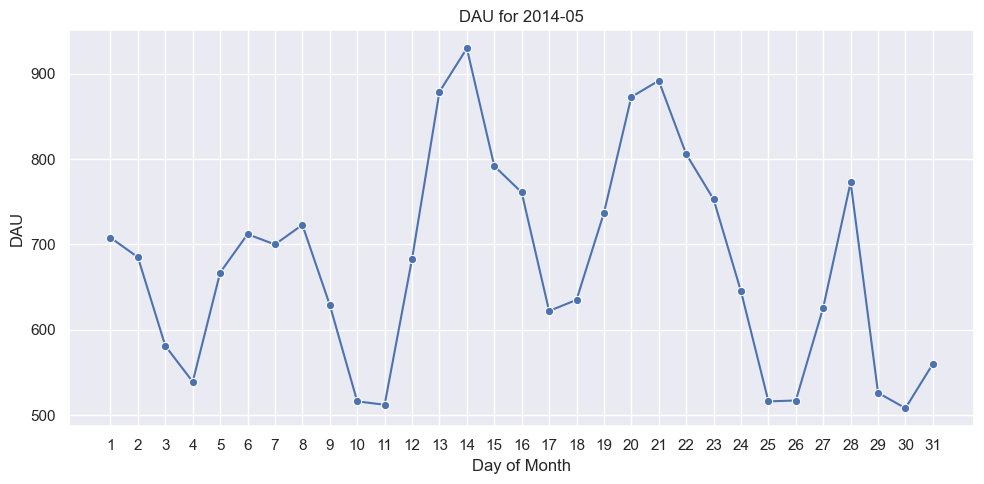

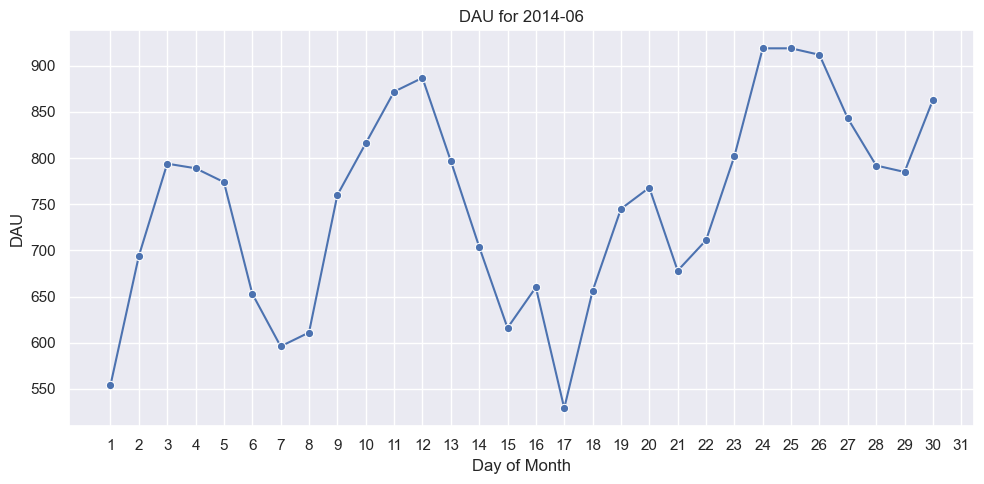

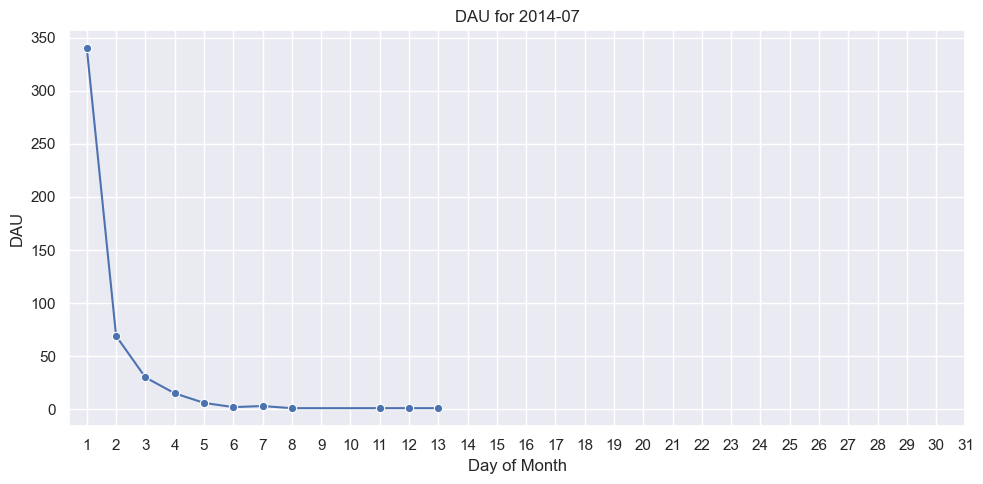

In [46]:
# 각 월별로 데이터를 분리합니다.
monthly_data = {month: data for month, data in dau.groupby(dau['date'].dt.to_period('M'))}

# 각 월별로 개별 그래프를 생성하고 저장 또는 출력합니다.
for month, data in monthly_data.items():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data, x='day', y='DAU', marker='o')
    plt.title(f'DAU for {month}')
    plt.xlabel('Day of Month')
    plt.ylabel('DAU')
    plt.xticks(range(1, 32))
    plt.tight_layout()
    plt.show()

# WAU(Weekly Active User)

In [18]:
# 주별 고유 사용자 수 계산 (WAU)
# NaT 값 제거
users_session_df = users_session_df.dropna(subset=['session_timestamp'])

# 주 정보만 추출하여 새로운 컬럼 'week'에 저장
users_session_df['week'] = users_session_df['session_timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
users_session_df.head()

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_97022/1715888765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['week'] = users_session_df['session_timestamp'].dt.to_period('W').apply(lambda r: r.start_time)


,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp,date,week
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api,2014-01-01 13:08:00,2014-01-01,2013-12-30
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52,2014-01-02,2013-12-30
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31,2014-01-02,2013-12-30
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-04 18:03:32,2014-01-04,2013-12-30
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-05 10:10:12,2014-01-05,2013-12-30


In [19]:
wau = users_session_df.groupby('week')['user_id'].nunique().reset_index()
wau.columns = ['week', 'WAU']
wau

,week,WAU
0,2013-12-30,1203
1,2014-01-06,2287
2,2014-01-13,2549
3,2014-01-20,2227
4,2014-01-27,2178
5,2014-02-03,2257
6,2014-02-10,2144
7,2014-02-17,2286
8,2014-02-24,2379
9,2014-03-03,2371


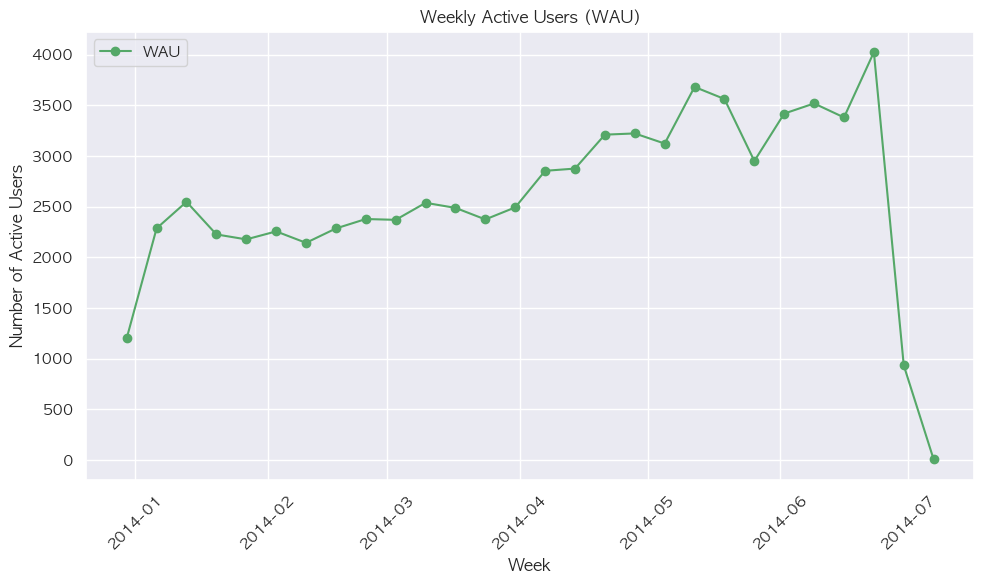

In [21]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(wau['week'], wau['WAU'], marker='o', linestyle='-', color='g', label='WAU')

# 그래프 제목과 축 레이블 설정
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Active Users')

# x 축 날짜 형식 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# 'week' 컬럼을 datetime 형식으로 변환합니다.
wau['week'] = pd.to_datetime(wau['week'])

# 'month' 컬럼을 추가하여 주의 월 부분을 저장합니다.
wau['month'] = wau['week'].dt.to_period('M')
wau

,week,WAU,month
0,2013-12-30,1203,2013-12
1,2014-01-06,2287,2014-01
2,2014-01-13,2549,2014-01
3,2014-01-20,2227,2014-01
4,2014-01-27,2178,2014-01
5,2014-02-03,2257,2014-02
6,2014-02-10,2144,2014-02
7,2014-02-17,2286,2014-02
8,2014-02-24,2379,2014-02
9,2014-03-03,2371,2014-03


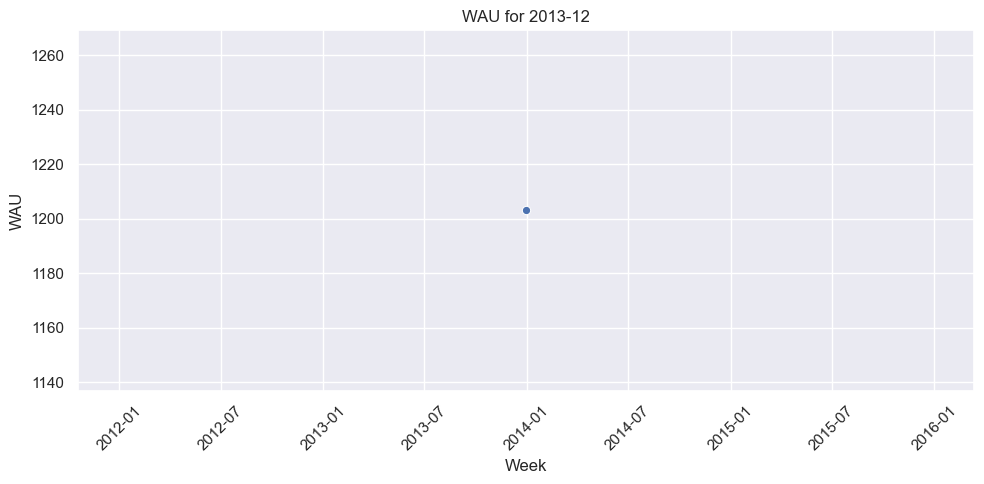

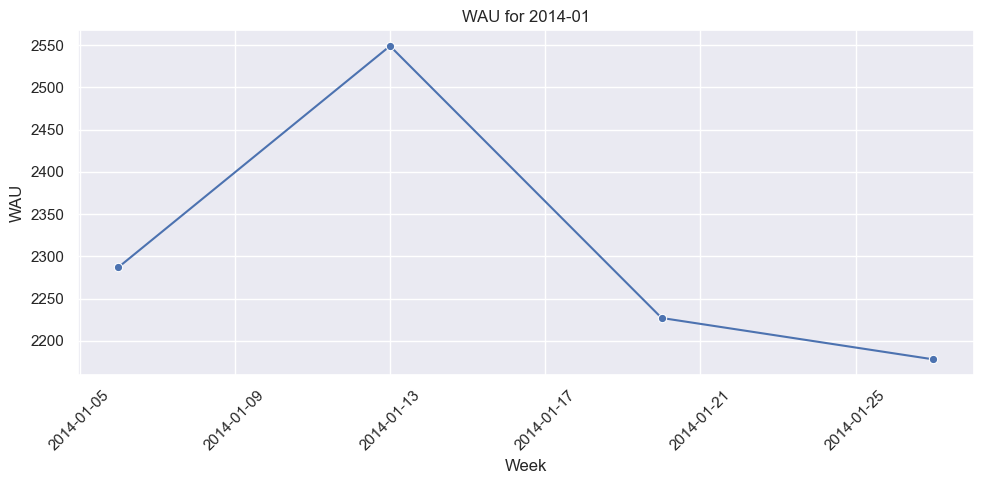

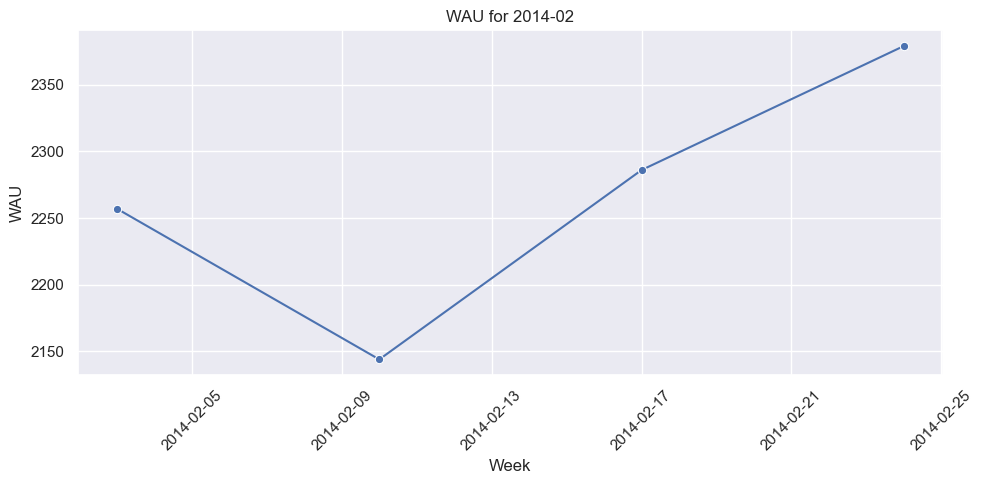

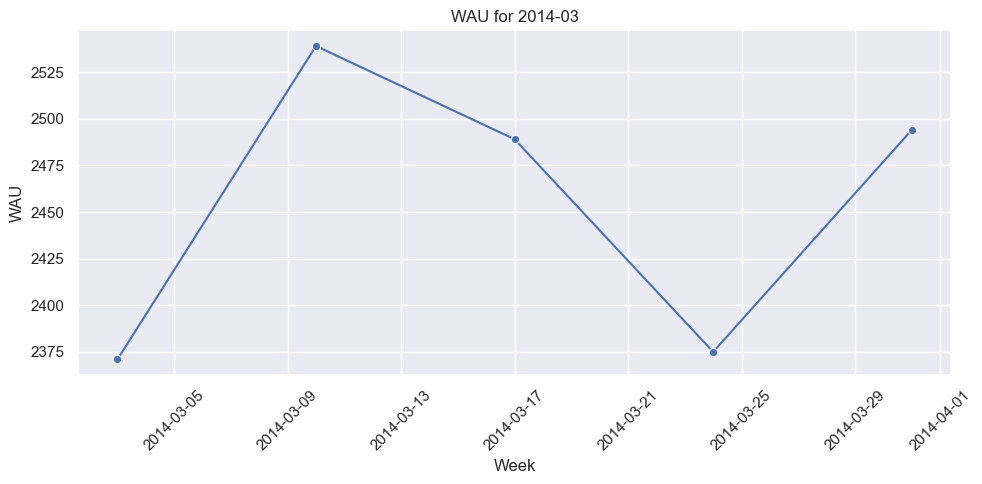

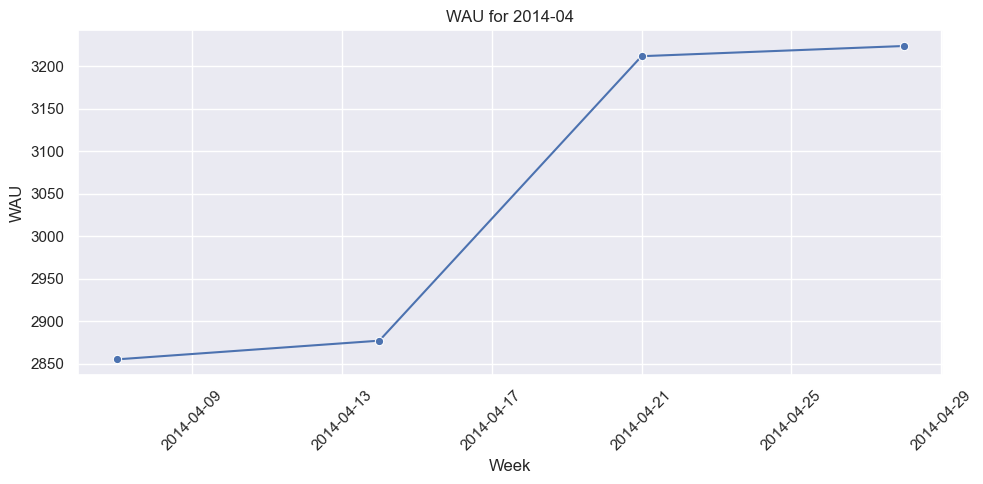

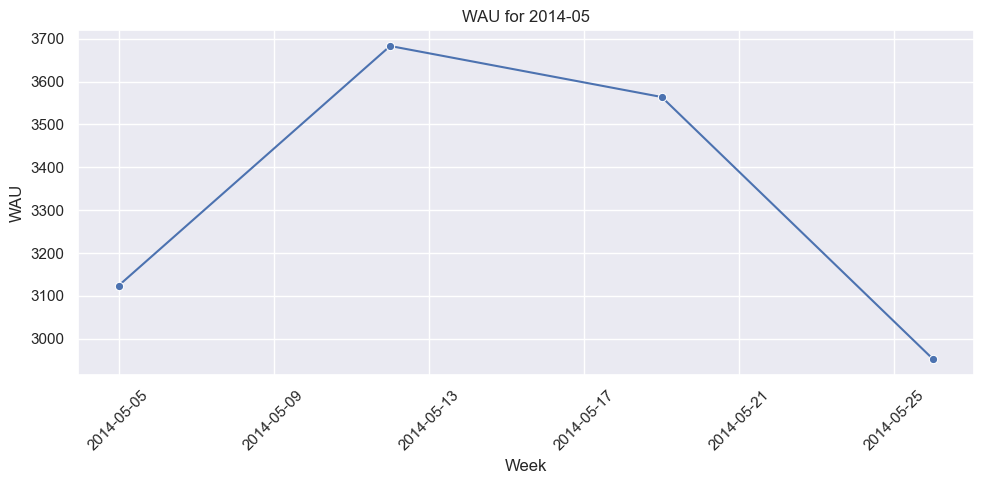

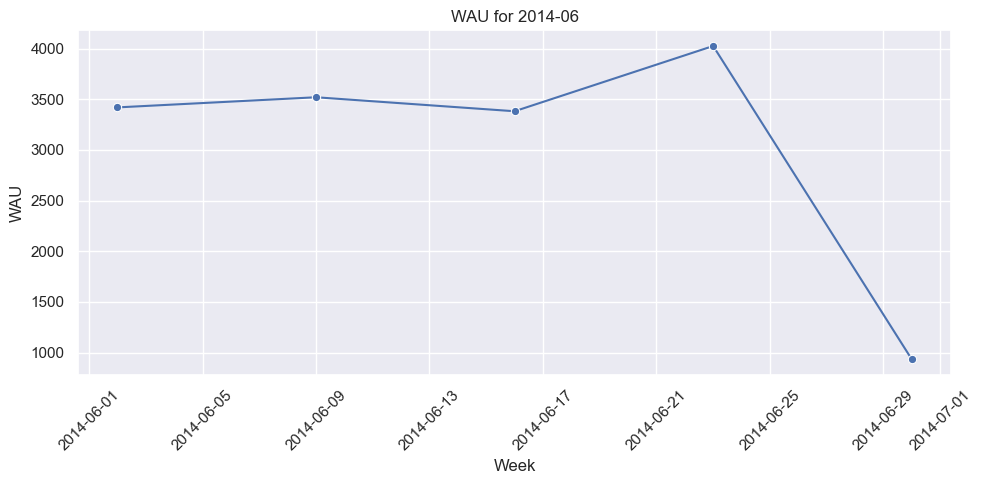

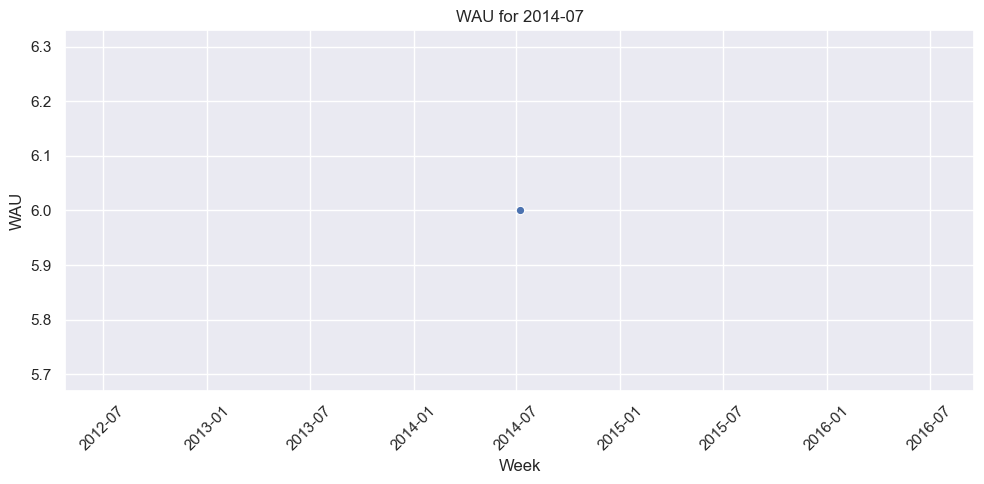

In [49]:
# 각 월별로 데이터를 분리합니다.
monthly_wau_data = {month: data for month, data in wau.groupby('month')}

# 각 월별로 개별 그래프를 생성하고 출력합니다.
for month, data in monthly_wau_data.items():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data, x='week', y='WAU', marker='o')
    plt.title(f'WAU for {month}')
    plt.xlabel('Week')
    plt.ylabel('WAU')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# MAU(Monthly Active User)

In [22]:
# 월 정보만 추출하여 새로운 컬럼 'month'에 저장
users_session_df['month'] = users_session_df['session_timestamp'].dt.to_period('M').apply(lambda r: r.start_time)
users_session_df.head()

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_97022/2351474495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['month'] = users_session_df['session_timestamp'].dt.to_period('M').apply(lambda r: r.start_time)


,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp,date,week,month
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api,2014-01-01 13:08:00,2014-01-01,2013-12-30,2014-01-01
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52,2014-01-02,2013-12-30,2014-01-01
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31,2014-01-02,2013-12-30,2014-01-01
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-04 18:03:32,2014-01-04,2013-12-30,2014-01-01
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-05 10:10:12,2014-01-05,2013-12-30,2014-01-01


In [23]:
# 월별 고유 사용자 수 계산 (MAU)
mau = users_session_df.groupby('month')['user_id'].nunique().reset_index()
mau.columns = ['month', 'MAU']
mau

,month,MAU
0,2014-01-01,9439
1,2014-02-01,8591
2,2014-03-01,10008
3,2014-04-01,11915
4,2014-05-01,13924
5,2014-06-01,14385
6,2014-07-01,407


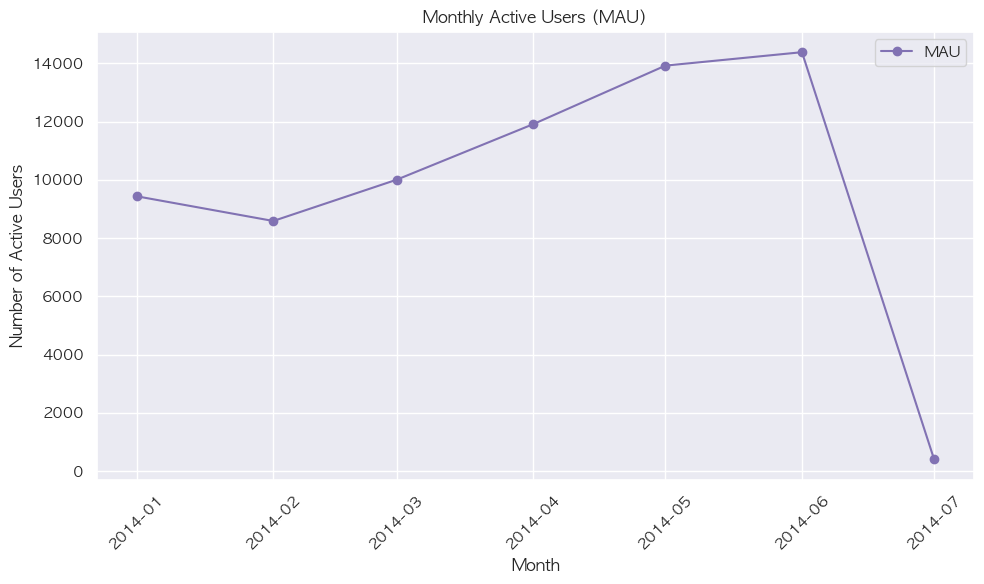

In [25]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(mau['month'], mau['MAU'], marker='o', linestyle='-', color='m', label='MAU')

# 그래프 제목과 축 레이블 설정
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')

# x 축 레이블 각도 설정
plt.xticks(rotation=45)

# 그래프 표시
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 서비스 고착도(stickiness) 분석
서비스 고착도는 DAU/MAU를 나타내며, 특정 월 동안 얼마나 많은 사용자가 일일 사용자로 활동하는지를 보여준다. 값이 높을수록 사용자가 더 자주 서비스를 이용하고 있음을 나타낸다. 

In [56]:
# 월별로 DAU 평균 계산
dau['date'] = pd.to_datetime(dau['date'])
mau['month'] = pd.to_datetime(mau['month'])

stickiness_df = dau
stickiness_df['month'] = dau['date'].dt.to_period('M').dt.to_timestamp()
stickiness_df

,date,DAU,month,day
0,2014-01-01,131,2014-01-01,1
1,2014-01-02,343,2014-01-01,2
2,2014-01-03,430,2014-01-01,3
3,2014-01-04,368,2014-01-01,4
4,2014-01-05,361,2014-01-01,5
...,...,...,...,...
187,2014-07-07,3,2014-07-01,7
188,2014-07-08,1,2014-07-01,8
189,2014-07-11,1,2014-07-01,11
190,2014-07-12,1,2014-07-01,12


In [57]:
# month 컬럼을 datetime 타입으로 변환
stickiness_df['month'] = pd.to_datetime(stickiness_df['month'])

# 데이터 병합
stickiness_df = pd.merge(stickiness_df, mau, on='month', how='left')
stickiness_df

,date,DAU,month,day,MAU
0,2014-01-01,131,2014-01-01,1,9439
1,2014-01-02,343,2014-01-01,2,9439
2,2014-01-03,430,2014-01-01,3,9439
3,2014-01-04,368,2014-01-01,4,9439
4,2014-01-05,361,2014-01-01,5,9439
...,...,...,...,...,...
187,2014-07-07,3,2014-07-01,7,407
188,2014-07-08,1,2014-07-01,8,407
189,2014-07-11,1,2014-07-01,11,407
190,2014-07-12,1,2014-07-01,12,407


In [58]:
# 서비스 고착도 계산
stickiness_df['stickiness'] = (stickiness_df['DAU'] / stickiness_df['MAU']) * 100
stickiness_df

,date,DAU,month,day,MAU,stickiness
0,2014-01-01,131,2014-01-01,1,9439,1.387859
1,2014-01-02,343,2014-01-01,2,9439,3.633860
2,2014-01-03,430,2014-01-01,3,9439,4.555567
3,2014-01-04,368,2014-01-01,4,9439,3.898718
4,2014-01-05,361,2014-01-01,5,9439,3.824558
...,...,...,...,...,...,...
187,2014-07-07,3,2014-07-01,7,407,0.737101
188,2014-07-08,1,2014-07-01,8,407,0.245700
189,2014-07-11,1,2014-07-01,11,407,0.245700
190,2014-07-12,1,2014-07-01,12,407,0.245700


In [59]:
# 2009년 이전 데이터 지우기
stickiness_df = stickiness_df[stickiness_df['date'].dt.month != 7]
stickiness_df

,date,DAU,month,day,MAU,stickiness
0,2014-01-01,131,2014-01-01,1,9439,1.387859
1,2014-01-02,343,2014-01-01,2,9439,3.633860
2,2014-01-03,430,2014-01-01,3,9439,4.555567
3,2014-01-04,368,2014-01-01,4,9439,3.898718
4,2014-01-05,361,2014-01-01,5,9439,3.824558
...,...,...,...,...,...,...
176,2014-06-26,912,2014-06-01,26,14385,6.339937
177,2014-06-27,843,2014-06-01,27,14385,5.860271
178,2014-06-28,792,2014-06-01,28,14385,5.505735
179,2014-06-29,785,2014-06-01,29,14385,5.457073


7월의 데이터는 끝까지 존재하지 않기 떄문에 제거한다. 

In [60]:
# 월별 평균 stickiness 계산
stickiness_monthly = stickiness_df.groupby('month')['stickiness'].mean().reset_index()
stickiness_monthly

,month,stickiness
0,2014-01-01,4.738747
1,2014-02-01,5.166536
2,2014-03-01,4.765542
3,2014-04-01,5.007134
4,2014-05-01,4.866510
5,2014-06-01,5.213533


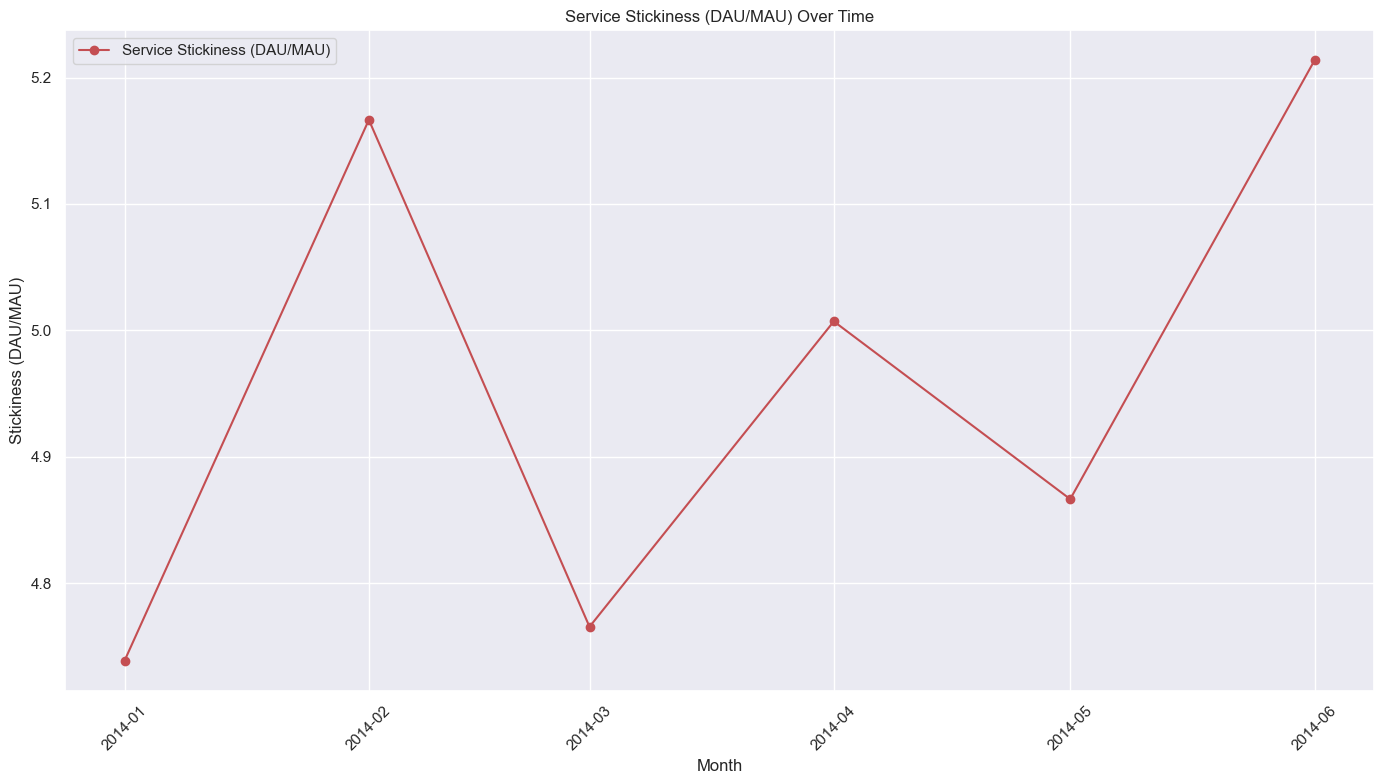

In [61]:
# 그래프 설정 및 시각화
plt.figure(figsize=(14, 8))

# 서비스 고착도 플로팅
plt.plot(stickiness_monthly['month'], stickiness_monthly['stickiness'], marker='o', linestyle='-', color='r', label='Service Stickiness (DAU/MAU)')

# 그래프 제목과 축 레이블 설정
plt.title('Service Stickiness (DAU/MAU) Over Time')
plt.xlabel('Month')
plt.ylabel('Stickiness (DAU/MAU)')

# x 축 레이블 각도 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()

서비스 고착도는 서비스 사용자의 일일 활동성이 월간 활동성 대비 얼마나 높은지를 나타낸다. 
고착도가 높을수록 사용자가 서비스를 자주 사용한다는 것을 의미한다. </br>
2월, 4월, 6월의 서비스 고착도가 높아보인다. 